In [39]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using Meshes
using Distances
using Random
using GeoTables
using DataFrames
import GLMakie as Mke
using Infiltrator
using AbstractGPs
using ProgressMeter
using Unitful
using JLD2
using Plots
using DataStructures
using POMDPModelTools
using POMDPs
using ParticleFilters
using LinearAlgebra
include("../src/config.jl");
include("../src/pomdp.jl")
# pomdp = CCSPOMDP();

FEATURE = :topSealThickness


:topSealThickness

In [40]:
visualize_gt(pomdp, 2)

### Test: Action function returns all actions

In [41]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

w/o scaling, For layer 1, column topSealThickness, 
mean uncertainty: 15.0 
with scaling factor: 15.0, mean uncertainty after scaling: 1.0
w/o scaling, For layer 1, column topSealThickness, 
mean uncertainty: 14.608577484457067 
with scaling factor: 15.0, mean uncertainty after scaling: 0.9739051656304714
Action: seismic_action, 
zzzAction Cost: -4, 
zzzUncertainty Change: 5.930563878742134, 
zzzSuitability: 1.09375
@NamedTuple{sp::CCSState, o::Vector{Any}, r::Float64}
Reward: 3.0243138787421344
Categorical{Float64, Vector{Float64}}[Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333,

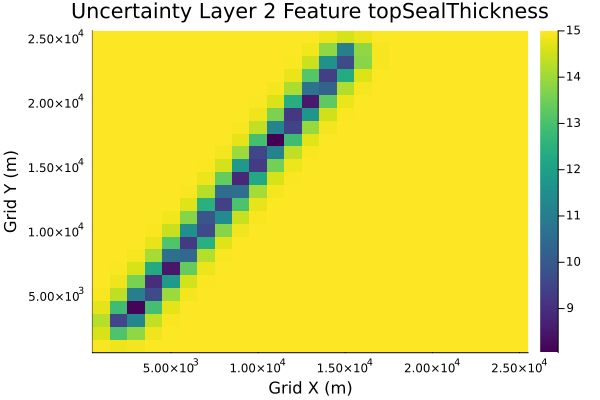

In [42]:
# Taking a seismic line action first
curstate = rand(initialstate(pomdp))
step = POMDPs.gen(pomdp, curstate, all_actions[21], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 2, FEATURE)

w/o scaling, For layer 1, column topSealThickness, 
mean uncertainty: 15.0 
with scaling factor: 15.0, mean uncertainty after scaling: 1.0
w/o scaling, For layer 1, column topSealThickness, 
mean uncertainty: 14.962569328599493 
with scaling factor: 15.0, mean uncertainty after scaling: 0.9975046219066327
Action: well_action, 
zzzAction Cost: -3, 
zzzUncertainty Change: 110.20156478178393, 
zzzSuitability: 1.09375
@NamedTuple{sp::CCSState, o::Vector{Any}, r::Float64}
Reward: 108.29531478178393
Categorical{Float64, Vector{Float64}}[Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 1.0, 0.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0]), Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])]


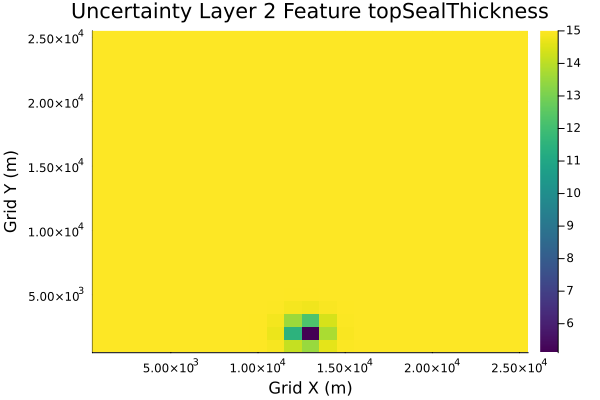

In [43]:
curstate = rand(initialstate(pomdp))
step = POMDPs.gen(pomdp, curstate, all_actions[2], nothing)
println(typeof(step), "\nReward: ", step.r)
curstate = step.sp

println(curstate.rocktype_belief)
visualize_uncertainty(curstate, 2, FEATURE)